In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def read_data(file_name_json):
  '''
  file_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  test = []
  j=0
  json_files = glob.glob(file_name_json)
  limit = len(json_files)-(len(json_files)%10)
  for jfile in json_files:
    if j < limit:
      j = j + 1
      with open(jfile) as f:
        data = json.load(f)
        if data['people']:
          kp= data['people'][0]['pose_keypoints_2d']
          kp = [kp[i] for i in range(0, 74) if (i+1) % 3 != 0]
          test.append(kp)
  x = int(len(test)/10)
  X_predict = np.asarray(test)
  X_predict = X_predict.reshape(x, 10, 50)
  return X_predict, len(test)

In [ ]:
# def read_data(file_name):
#   '''
#   INPUT: file_name = text file which is to be converted ito array
#   OUTPUT: data = return the array
#   '''
#   number = [i for i in range(0, 74) if (i+1) % 3 != 0]
#   data = np.loadtxt(file_name, usecols=number, delimiter = ",")
#   return data

In [ ]:
def generate_label():
  '''
  OUTPUT: Y_train - Labels for training data
          Y_val - Labels for validation data
  '''
  y = np.zeros(60)
  y = np.append(y, np.ones(80))        #1
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #2
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #3
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #4
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #5
  y = np.append(y, np.zeros(60))     
  y = np.append(y, np.ones(80))        #6
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #7
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #8
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #9
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #10
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #11
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #12
  y = np.append(y, np.zeros(2520))     #30
  y = np.append(y, np.zeros(90))
  y = np.append(y, np.ones(50))        #31
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #32
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #33
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #34
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #35
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #36
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #37
  y = np.append(y, np.zeros(60)) 
  y = np.append(y, np.ones(80))        #38
  y = np.append(y, np.zeros(80))
  y = np.append(y, np.ones(60))        #39
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #40
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #41
  y = np.append(y, np.ones(700))       #46
  y = np.append(y, np.zeros(420))      #49   
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #50
  y = np.append(y, np.zeros(420))      #53
  y = np.append(y, np.ones(840))       #59
  y = np.append(y, np.zeros(3500))     #84
  y = np.append(y, np.ones(840))       #90
  y = np.append(y, np.zeros(40))
  y = np.append(y, np.ones(100))       #91
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #92
  y = np.append(y, np.zeros(70))
  y = np.append(y, np.ones(70))        #93
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #94
  y = np.append(y, np.zeros(40)) 
  y = np.append(y, np.ones(100))       #95
  y = np.append(y, np.zeros(60))
  y = np.append(y, np.ones(80))        #96
  y = np.append(y, np.zeros(50)) 
  y = np.append(y, np.ones(90))        #97
  y = np.append(y, np.zeros(30)) 
  y = np.append(y, np.ones(110))       #98
  y = np.append(y, np.zeros(110))
  y = np.append(y, np.ones(30))        #99
  y = np.append(y, np.zeros(30))
  y = np.append(y, np.ones(110))       #100
  y = np.append(y, np.zeros(1260))       #109
  y = np.append(y, np.ones(1260))       #118
  y = np.append(y, np.zeros(2800))       #138
  y = np.append(y, np.ones(3080))       #160

  Y_train = np.concatenate((y[:9800], y[16520:22400]), axis=0)
  Y_val = y[9800:16520]

  return Y_train,Y_val

In [ ]:
#GETTING TRUE VALUES
Y_train,Y_val = generate_label()
Y_val = Y_val.reshape(672,10,1)
print('Y_validation = ',Y_val.shape)

Y_validation =  (672, 10, 1)


In [ ]:
# file_name_val = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_val.txt"   ##CHANGE accordingly while increasing dataset##
# Xval = read_data(file_name_val) 
# file_name_val1 = "/content/drive/My Drive/CSCE636/Train_Val_Test/X_Val_new.txt"   ##CHANGE accordingly while increasing dataset##
# Xval_new = read_data(file_name_val1)
# Xval = np.concatenate((Xval, Xval_new), axis=0)
# Xval = Xval.reshape(672,10,50)

# #FOR Y-file:
# Ytrain,Yval = generate_label()
# Ytrain = Ytrain.reshape(1568,10,1)
# Yval = Yval.reshape(672,10,1)


# print('X-validation = ',Xval.shape)
# print('Y-validation = ',Yval.shape)

In [ ]:
##LOAD THE SAVED MODEL##
model = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission3/model_submit3_final.hdf5')

In [ ]:
#PREDICT THE MODEL#
def predict(file_name_json):
  X_predict, num_frames = read_data(file_name_json)
  ypre = model.predict(X_predict)
  ypre=ypre.flatten()
  df = pd.DataFrame(ypre) 
  rolling = df.rolling(window=10)
  rolling_mean = rolling.mean()
  fps = 30
  x = np.linspace(0,num_frames/fps,num_frames)
  plt.figure(1)
  #print(len(ypre))
  plt.plot(x, ypre)
  plt.axhline(y=0.5, color='r', linestyle='-')
  plt.ylabel('label')
  plt.xlabel('time in seconds')
  plt.legend(['Actual predicted data'], loc='best' )
  plt.ylim([0,1.2])
  plt.title('Prediction Output For Sample Videos')
  plt.show()

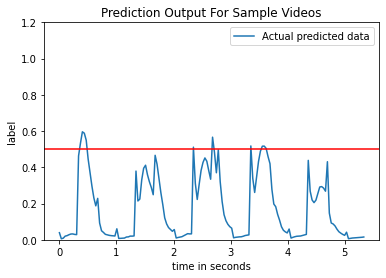

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/71/*'  #change json file for different test videos
predict(file_name_json)

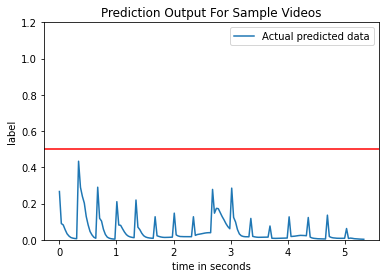

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/73/*'  #change json file for different test videos
predict(file_name_json)

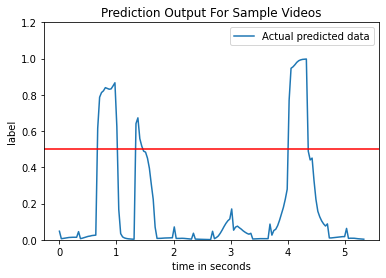

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/74/*'  #change json file for different test videos
predict(file_name_json)

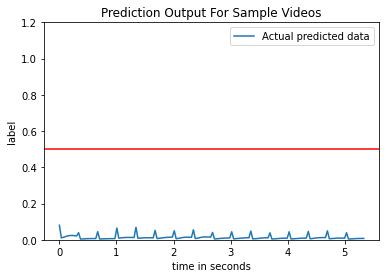

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/75/*'  #change json file for different test videos
predict(file_name_json)

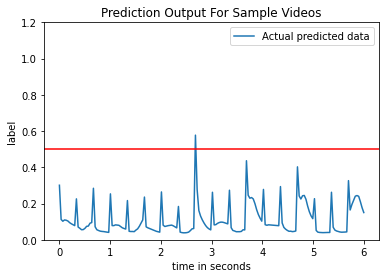

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/76/*'  #change json file for different test videos
predict(file_name_json)

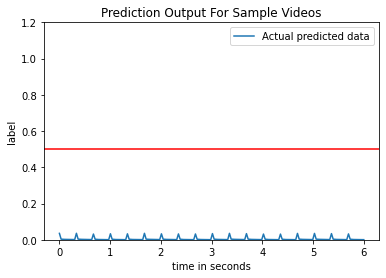

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/77/*'  #change json file for different test videos
predict(file_name_json)

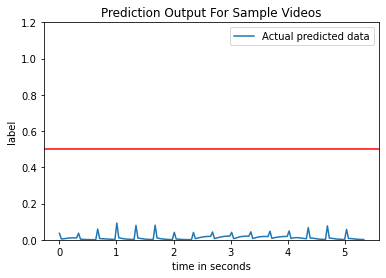

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/78/*'  #change json file for different test videos
predict(file_name_json)

## Positive Predictions

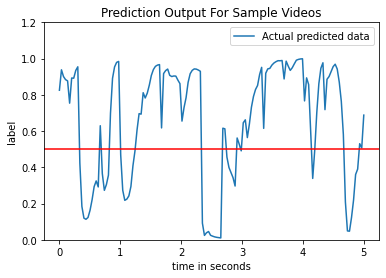

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/86/*'  #change json file for different test videos
predict(file_name_json)

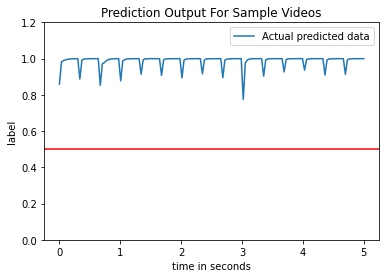

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/87/*'  #change json file for different test videos
predict(file_name_json)

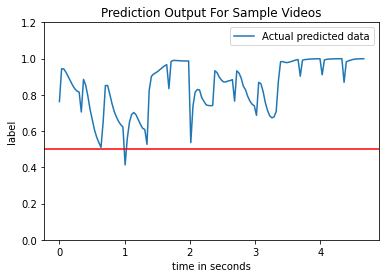

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/88/*'  #change json file for different test videos
predict(file_name_json)

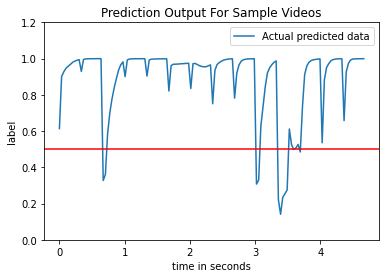

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/89/*'  #change json file for different test videos
predict(file_name_json)

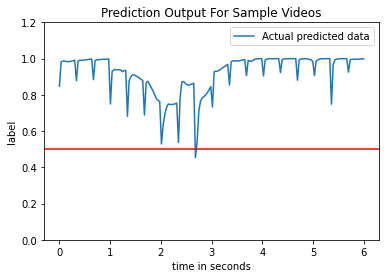

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/90/*'  #change json file for different test videos
predict(file_name_json)

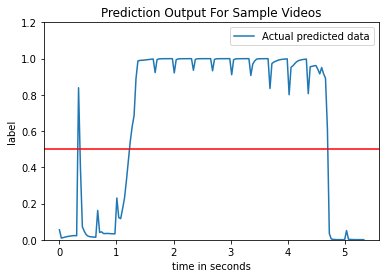

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/91/*'  #change json file for different test videos
predict(file_name_json)

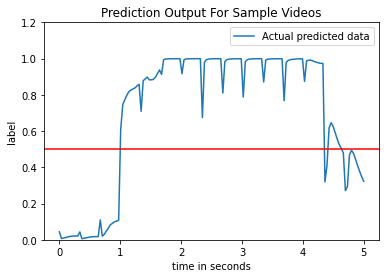

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/92/*'  #change json file for different test videos
predict(file_name_json)

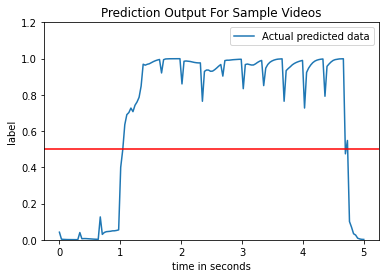

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/94/*'  #change json file for different test videos
predict(file_name_json)

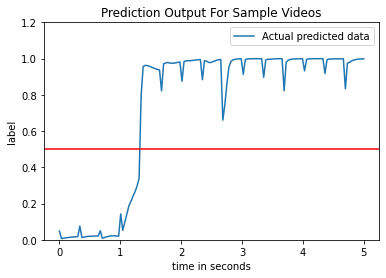

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/95/*'  #change json file for different test videos
predict(file_name_json)

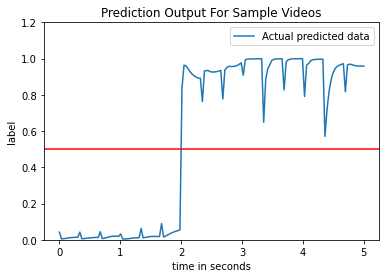

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/96/*'  #change json file for different test videos
predict(file_name_json)

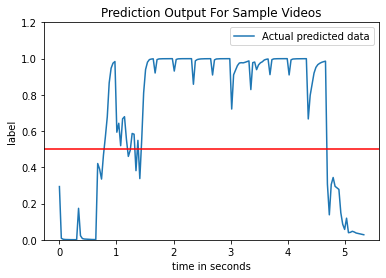

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/98/*'  #change json file for different test videos
predict(file_name_json)

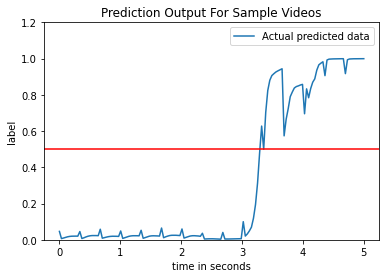

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/99/*'  #change json file for different test videos
predict(file_name_json)

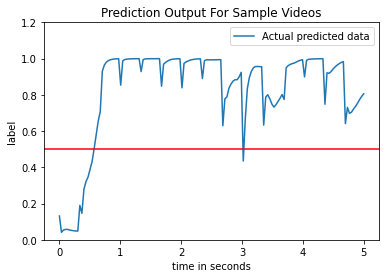

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/110/*'  #change json file for different test videos
predict(file_name_json)

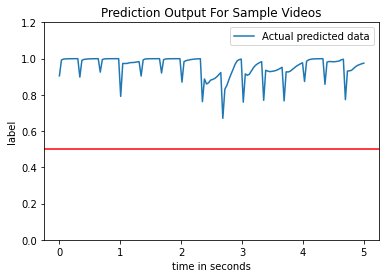

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/111/*'  #change json file for different test videos
predict(file_name_json)

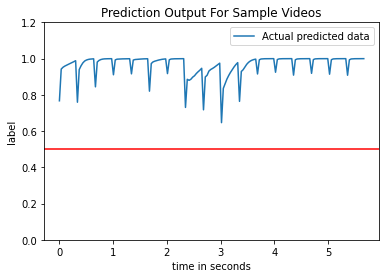

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/112/*'  #change json file for different test videos
predict(file_name_json)

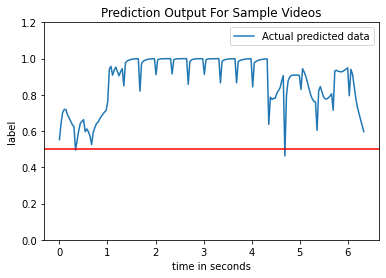

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/115/*'  #change json file for different test videos
predict(file_name_json)

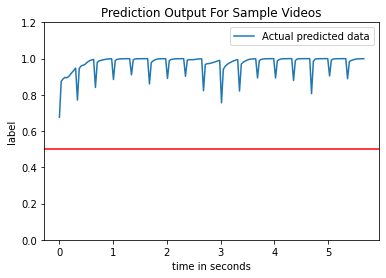

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/116/*'  #change json file for different test videos
predict(file_name_json)

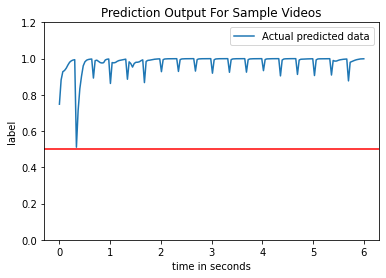

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/117/*'  #change json file for different test videos
predict(file_name_json)

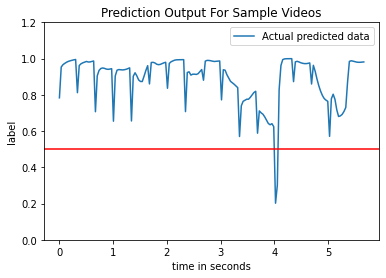

In [ ]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/118/*'  #change json file for different test videos
predict(file_name_json)